In [69]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#Leitura dos dados para esplorar/analisar e treino e teste do modelo preditivo.
#Dados extraídos de: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
#CSV postado no github para facilitar a importação

df_diabetes = pd.read_csv('https://raw.githubusercontent.com/lucianesantos/DiabetesML/refs/heads/main/diabetes.csv', sep=",")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#**Explicação/Entendimento dos dados** - extraído do mesmo site

A base se refere apenas a mulheteres.

**Pregnancies** - Number of times pregnant - número de vezes que pessoa ficou grávida.

**Glucose** - Plasma glucose concentration a 2 hours in an oral glucose tolerance test - concentração de glicose

**BloodPressure** - Diastolic blood pressure (mm Hg)- pressao arterial

**SkinThickness** - Triceps skin fold thickness (mm) - Gordura do triceps

**Insulin** - 2-Hour serum insulin (mu U/ml) - Insulina de 2 horas

**BMI** - Body mass index (weight in kg/(height in m)^2) - IMC

**DiabetesPedigreeFunction** - Diabetes pedigree function
Essa é uma função que pontua a probabilidade de desenvolvimento de diabetes com base no histórico familiar.

**Age** - Age (years)

**Outcome** - Class variable (0 or 1) 268 of 768 are 1, the others are 0
0 - não diabético, 1 - diabético - **nossa target **

#**Análise Exploratória de Dados**

In [71]:
#Tipos de Variáveis do dataset - nota-se que todas as variáveis são numéricas, do tipo inteiro ou float.
#Nenhuma variável numérica classificada como String/Object - sem necessidade de conversões
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [72]:
#Tamanho da base - analisando o tamanho da base para conhecimento do tamanho da amostra de dados
df_diabetes.shape

(768, 9)

In [73]:
#Tem dados nulos? - verificando se a base tem dados núlos para que isso não comprometa nosso algoritmo
df_diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [83]:
#tem dados duplicados? Nesse tipo de dataset, eu acho que seria grande coincidencia uma pessoa com as mesmas informações médicas, mas a análise de dados duplicados é
#importante para não enviezar o modelo - aqui notamos que não há informações duplicadas.
df_diabetes.duplicated().sum()

np.int64(0)

#** Gerando Visualizações com matplotlib para entender a base**

A base de dados não possui datas, então não há como analisar tenddências em decorrer do tempo com grafico de linhas.

Estou gerando um histograma para conhecer a base.

Estou gerando a matriz de correlação para ver a correlaçaõ entre as variáveis e também graficos de dispersão para analisar o resultado da correlação dos dados.

Estou gerando um gráfico de barras para ver a proporção do diagnóstico por faixa etária e a quantidade de gestações e a proporção de diabeticos ou nao da base.


# Análise Exploratória de Dados

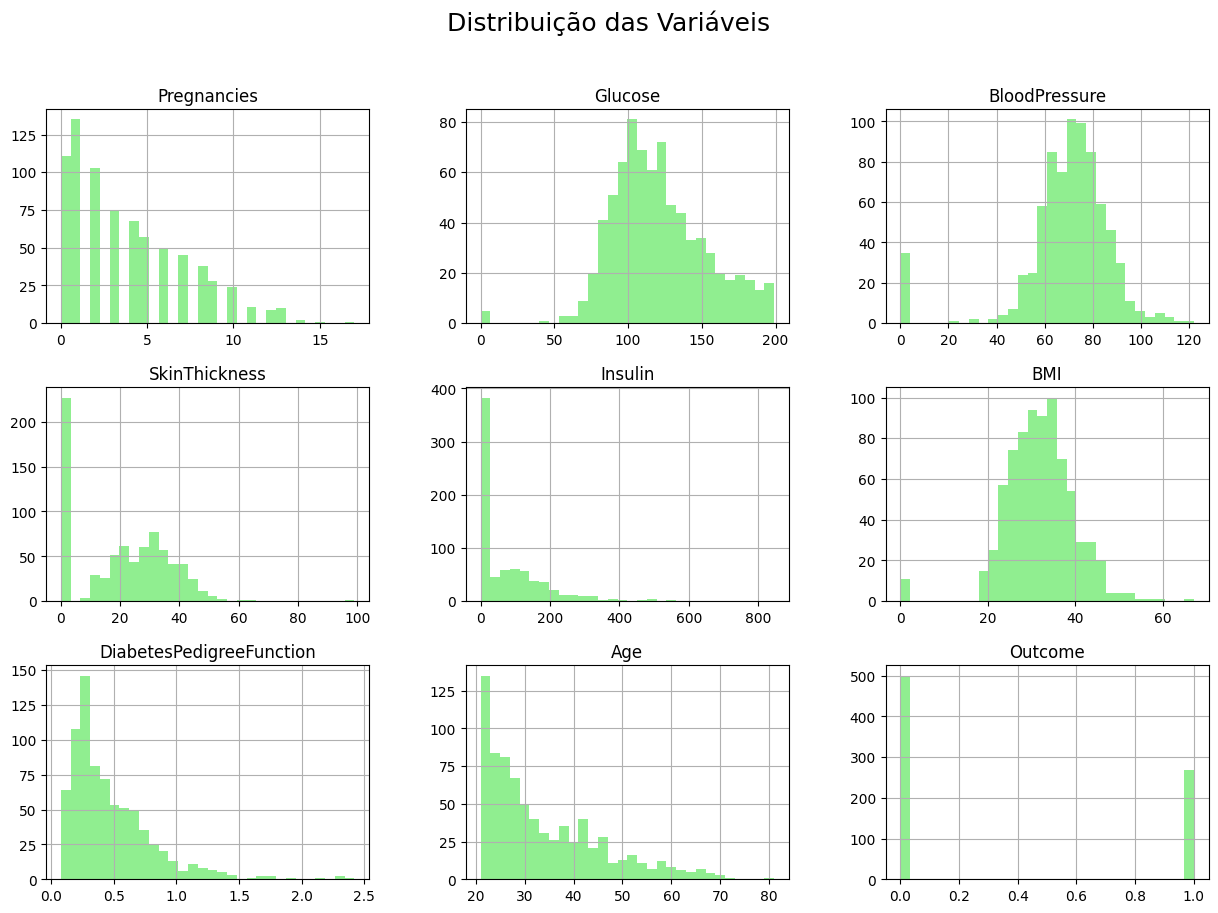

In [84]:
df_diabetes.hist(bins=30, figsize=(15, 10), color='lightgreen')
plt.suptitle('Distribuição das Variáveis', fontsize=18)
plt.show()

Aqui estou visualizando como as variáveis estão distribuidas na base fornecida.
Acima olhei que não há valores nulos ou duplicados e aqui podemos ver a distribuição e concentração de valores para entender a base e também verificar valores zerados.

**Pregnancies** - a maioria das mulheres teve entre 0 e 5 gestações. Aqui é aceitável ter valores 0.

**Glicose** - Maior concentração entre 100 e 150, podendo ser considerado uma hiperglicemia, e uma concentração menor entre 150 e 200. Alguns poucos valores zerados o que pode ser entendido como falta de preenchimento ou algum tipo de erro na coleta de dados, pois não é aceitável glicose zerada.

**BloodPressure** -  Maior concentração entre 60 e 80, sendo esses valores considerados uma pressão normal. Aqui também contém valores zerados e não é aceitável.

**Age** - Maior concentração da base entre 20 e 30 anos e as demais entre 30 e 50. Não há um volume grande de mulheres idosas na base e idade é considerado o maior risco de diabetes.

**BMI** ou IMC ou Massa Corporal - Maior concentração da base entre 30 e 35, mas distribuidos entre 20 e 40. Alguns valores zerados, o que é não é aceitável.


**Insulin** - muitos valores zerados. As informações variam de 0 a 200. Poucos valores de 200 a 400. Aqui precisamos é preciso definir como tratar valor zerado, já que muitos diabéticos podem ter a insulina alta e essa pode ser uma informação relevante para análise preditiva



.


In [85]:
#filtro - diabéticos com insulina maior que 200
filtro = df_diabetes[(df_diabetes['Outcome'] == 1) & (df_diabetes['Insulin'] >=200)] [['Glucose', 'Insulin']]
filtro.shape


(47, 2)

In [86]:
#filtro - diabéticos com insulina menor que 200.
filtro = df_diabetes[(df_diabetes['Outcome'] == 1) & (df_diabetes['Insulin'] <=200)] [['Glucose', 'Insulin']]
filtro.shape

(222, 2)

In [87]:
#filtro - diabéticos com insulina igual a zero
filtro = df_diabetes[(df_diabetes['Outcome'] == 1) & (df_diabetes['Insulin'] ==0)] [['Glucose', 'Insulin']]
filtro.shape

(138, 2)

#Matriz de Correlação#

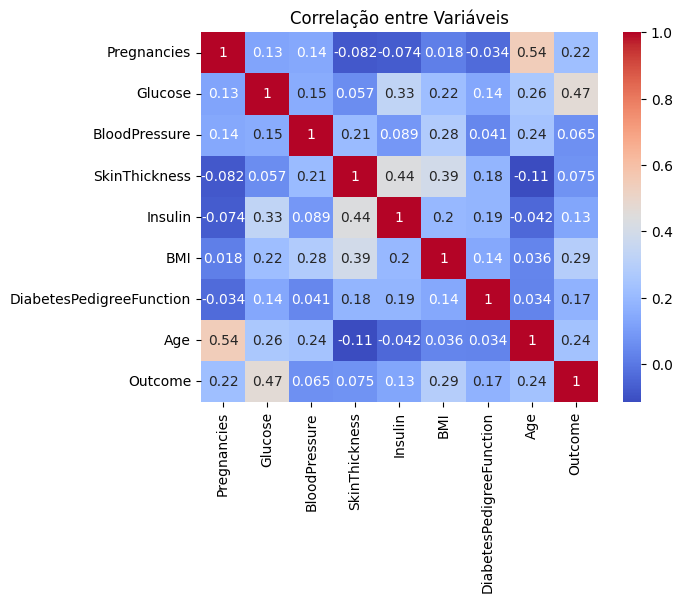

In [88]:
sns.heatmap(df_diabetes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

Analisando a correlação das variáveis, com a variável **Outcome**, nossa variável **target**, observa-se que a **Glucose** tem alta relação com a Outcome **0.47**, logo, quanto mais alta a glicose do paciente, maior a sua chance de ter o resultado 1 - diabético.

Seguido da correlação da **BMI** (Massa Corporal)** 0.29** que também poderia indicar que uma massa corporal mais alta, também leva a mais chances do diagnóstico de Diabetes -  Outcome = 1.

Com **0.24** de correlação, a Idade (**Age**) pode indicar um alto indice de um diagnóstico de diabetes e com **0.22** de correlação, o número de gestações (**Pregnancies**).

As variáveis BloodPressure  e SkinThickness possuem baixa correlação com o Outcome, logo não irei analisá-las.

As demais correlações relevantes são Pregnancies com Age e SkinThickness com BMI e Insulin.
Isso indica que as pessoas mais velhas tiveram mais gestações e que pessoas com maior gordura subcutânea, tem mais insulina no corpo e o IMC maior.

#Correlaçao entre variáveis

<Axes: xlabel='Glucose', ylabel='Outcome'>

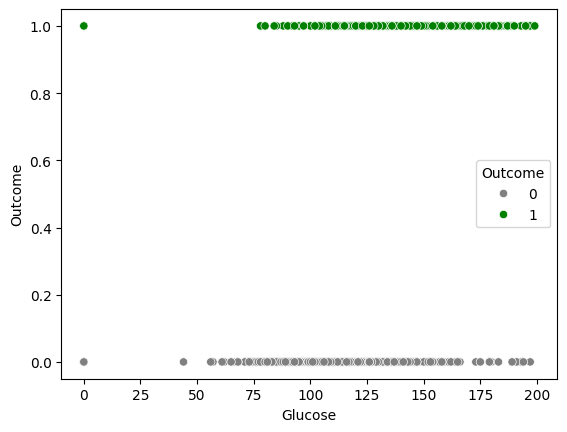

In [89]:
cores = {0: 'gray', 1: 'green'}
sns.scatterplot(data=df_diabetes, x='Glucose', y='Outcome', hue='Outcome', palette=cores)

Nota-se que mulheres com a **glicose entre 75 e 200** foram diagnosticados com diabetes. Essa é uma variável com forte influência na análise preditiva.

<Axes: xlabel='BMI', ylabel='Outcome'>

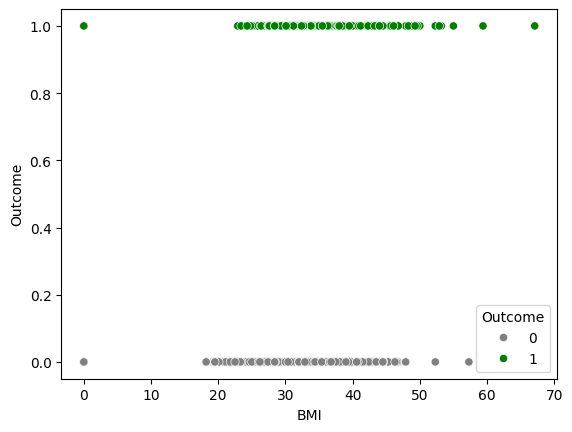

In [90]:
sns.scatterplot(data=df_diabetes, x='BMI', y='Outcome', hue='Outcome' , palette=cores)

Nota-se que mulheres com a **massa corporal entre 25 e 50** foram diagnosticados com diabetes.

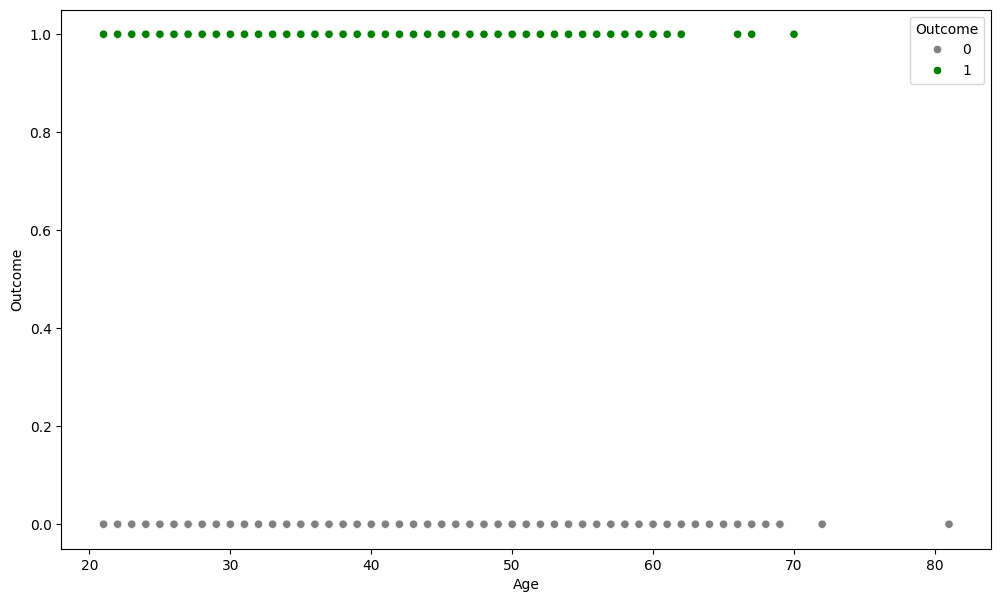

In [91]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_diabetes, x='Age', y='Outcome', hue='Outcome', palette=cores)
plt.show()

Com uma correlação de 0.24, com o gráfico de dispersão, observa-se que a faixa etária das mulheres com diagnóstico de diabetes, é semelhante a das mulheres sem diagnóstico. Não há grande concentração em uma faixa etária especifica, logo, para uma correlação moderada de 0.24, podemos entender que a idade sozinha, não é uma variável que pode ser considerada para uma análise preditiva.
Aumentei o gráfico para ver melhor.

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

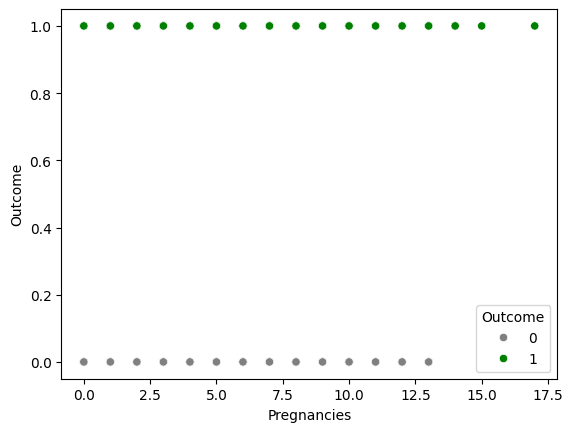

In [92]:
sns.scatterplot(data=df_diabetes, x='Pregnancies', y='Outcome', hue='Outcome', palette=cores)

Com uma correlação de 0.22, no gráfico de dispersão, observamos que existe uma leve tendência de diagnóstico de diabetes para mulheres com mais gestações. Isso pode ser visto com gestações acima de 12. Mas essa não é uma caracteristica que pode ser analisada sozinha, confirmando que a correlação de 0.22 é fraca para a análise.


#Correlaçao entre pares

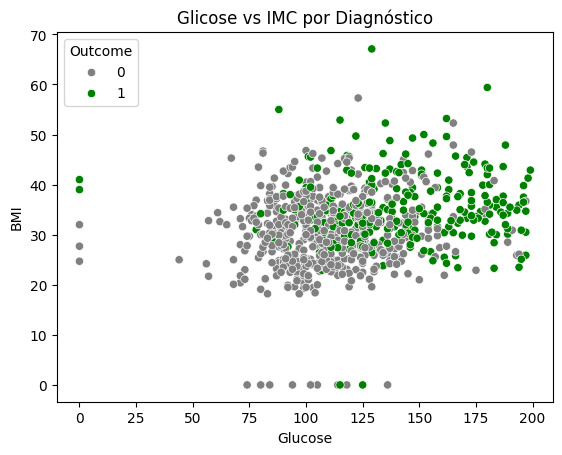

In [93]:
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df_diabetes,  palette=cores)
plt.title('Glicose vs IMC por Diagnóstico')
plt.show()

Correlacionando a Glicose com a Massa corporal, nota-se um grande agrupamento para os casos de diabetes em mulheres com **glicose entre 100 e 150 e massa corporal entre 25 a 35.** Depois os valores vão se espalhando nessa mesma faixa da massa corporal, porém em uma glicose até 200.

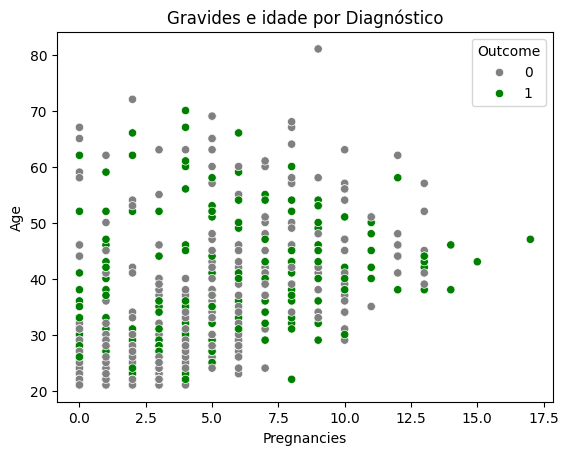

In [94]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=df_diabetes, palette=cores)
plt.title('Gravides e idade por Diagnóstico')
plt.show()

Nota -se que m**ulheres com mais de 30 anos, com mais de 5 gestações**  foram diagnosticadas com diabetes

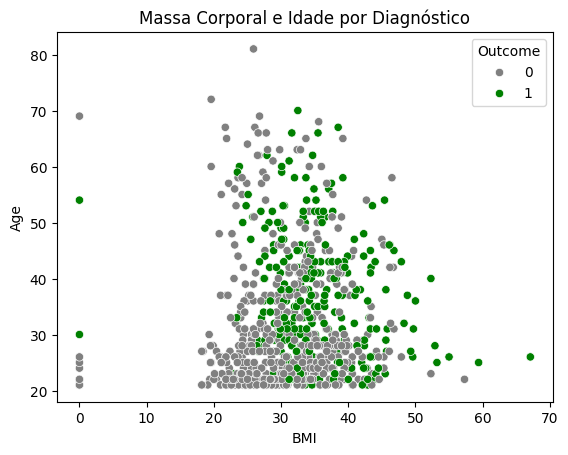

In [95]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=df_diabetes, palette=cores)
plt.title('Massa Corporal e Idade por Diagnóstico')
plt.show()

Nota-se grande concentração de diabéticos na faixa etária entre **30 a 40 anos para uma massa corporal entre 30 e 40**

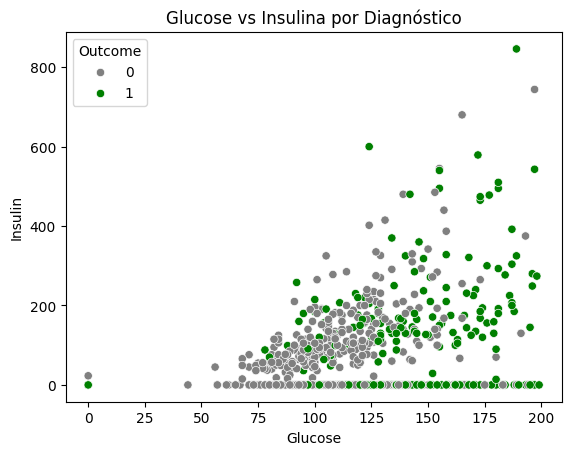

In [96]:
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df_diabetes, palette=cores)
plt.title('Glucose vs Insulina por Diagnóstico')
plt.show()

IMC Alto, Glicose Alta

Nota-se um volume de diabéticos com glicose entre 75 e 200, porém com a a insulina entre 150 a 230. Existe uma parte dos diabéticos com insulina de 250 a 600, mas sem um grande agrupamento/volume.
Aqui podemos lembrar que existiam valores de insulina zerado. Talvez a pessoa não respondeu esse item na pesquisa ou houve erro no dataset.



**Obs**.: O nível de insulina no sangue de um diabético é igual ou superior a 200 mg/dl1. O valor normal de insulina é inferior a 99 mg/dL2.

#Gráfico de Barras

<ipython-input-97-4011407533>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diabetes.groupby('FaixaEtaria')['Outcome'].mean().plot(kind='bar', color='lightgreen')


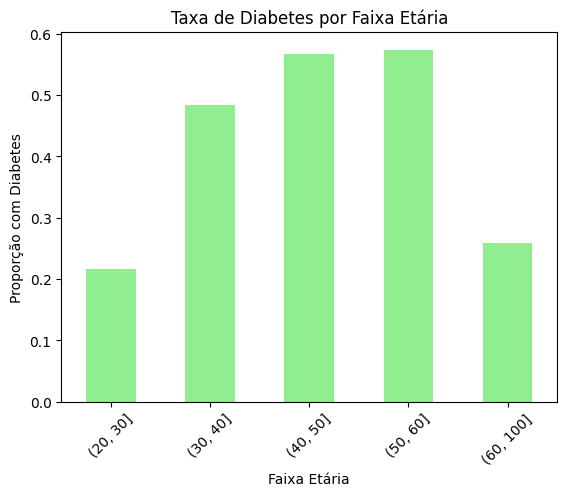

In [97]:
df_diabetes['FaixaEtaria'] = pd.cut(df_diabetes['Age'], bins=[20, 30, 40, 50, 60, 100])

df_diabetes.groupby('FaixaEtaria')['Outcome'].mean().plot(kind='bar', color='lightgreen')
plt.title('Taxa de Diabetes por Faixa Etária')
plt.ylabel('Proporção com Diabetes')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.show()

Proporção de diabéticos por faixa etária - nota-se maior  proporção nas faixas entre 40 a 60 anos.

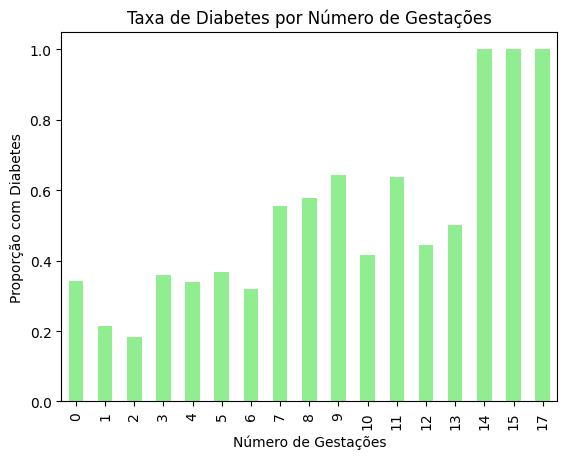

In [98]:
df_diabetes.groupby('Pregnancies')['Outcome'].mean().plot(kind='bar', color='lightgreen')
plt.title('Taxa de Diabetes por Número de Gestações')
plt.ylabel('Proporção com Diabetes')
plt.xlabel('Número de Gestações')
plt.show()

Nesse gráfico de barras, estou demonstrando a proporção da diabetes , por número de gestação. Observa-se maior proporção de diabéticos para mulheres que tiveram mais gestações.

In [99]:
count_diabetes_sim = df_diabetes[df_diabetes['Outcome'] == 1].shape[0]
count_diabetes_nao = df_diabetes[df_diabetes['Outcome'] == 0].shape[0]

In [100]:
counts = [count_diabetes_sim, count_diabetes_nao]

In [101]:
counts

[268, 500]

In [102]:
count_diabetes_nao

500

In [103]:
count_diabetes_sim

268

Explicação

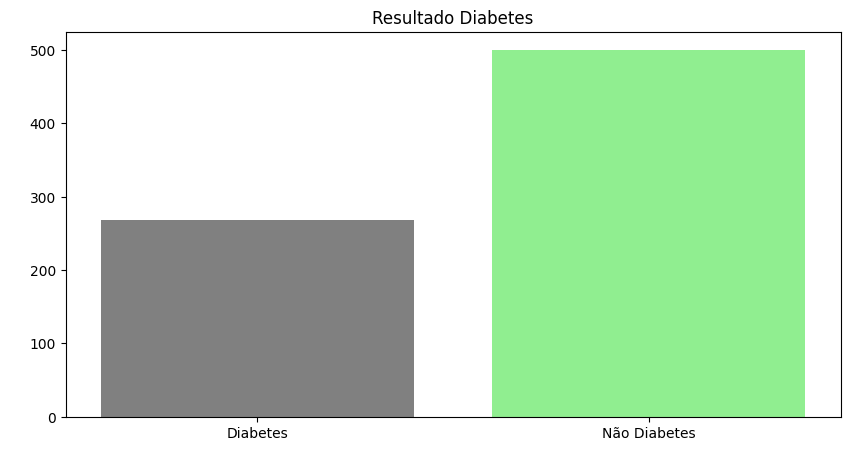

In [104]:
labels = ['Diabetes', 'Não Diabetes']
plt.figure(figsize=(10,5))

plt.bar(labels, counts, color = ['gray', 'lightgreen'])
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Resultado Diabetes')
plt.show()

Neste gráfico, estou apresentando a quantidade da amostra que possui diabetes e o total que não possui.

#Conclusão

A base contém 75% de mulheres diabéticas.
Observamos que o diagnóstico de diabetes acontece para a maioria com glicose entre 75 e 200 e massa corporal entre 25 e 50, com insulina entre 150 e 230.
Essa informação está correlacionada, na faixa de glicose entre 100 e 150 e massa corporal entre 25 a 35.
Nota-se também que mulheres com maior número de gestacões tiveram o diagnóstico de diabetes.
Existem valores zerados na base, que não irei tratar para a análise preditiva, pois, retirando eles da base, comprometeria o total e preencher com outra informação também compromoteria a análise preditiva.

In [105]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,FaixaEtaria
0,6,148,72,35,0,33.6,0.627,50,1,"(40, 50]"
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 40]"
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 40]"
3,1,89,66,23,94,28.1,0.167,21,0,"(20, 30]"
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,"(60, 100]"
764,2,122,70,27,0,36.8,0.340,27,0,"(20, 30]"
765,5,121,72,23,112,26.2,0.245,30,0,"(20, 30]"
766,1,126,60,0,0,30.1,0.349,47,1,"(40, 50]"


In [106]:
df_diabetes.drop(columns='FaixaEtaria', inplace=True)

#Machine Learning

In [107]:
#importando as bibliotecas para o machine learning
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [108]:
#Separando os dados - encontrando a variável target e explicando o porque.
x= df_diabetes.drop(['Outcome'],axis=1) # A amostra de X não terá a coluna Outcome
y = df_diabetes['Outcome'] # A amostra de Y só não terá a coluna Outcome - Esse é o nosso target, nosso objetivo, essa classificaçaõ que queremos encontrar, por isso nomeamos ela de Y.

In [109]:
#Dividindo o conjunto de dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # Estou separando 30% dos dados para teste.

In [110]:
#Criando/ Instanciando o classificador
knn = KNeighborsClassifier(n_neighbors=3) #defini que o numero de vizinhos do KNN serão 3

In [111]:
#hora do treino
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [112]:
# Testando o classificador
accuracy = knn.score(x_test, y_test)
print("Temos uma Acurácia de: {:.2f}%".format(round(accuracy,2) * 100))

Temos uma Acurácia de: 68.00%


In [113]:
print (x_test, y_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
274           13      106             70              0        0  34.2   
309            2      124             68             28      205  32.9   
650            1       91             54             25      100  25.2   
638            7       97             76             32       91  40.9   
752            3      108             62             24        0  26.0   
..           ...      ...            ...            ...      ...   ...   
93             4      134             72              0        0  23.8   
553            1       88             62             24       44  29.9   
736            0      126             86             27      120  27.4   
293            1      128             48             45      194  40.5   
525            3       87             60             18        0  21.8   

     DiabetesPedigreeFunction  Age  
274                     0.251   52  
309                     0.875   30  


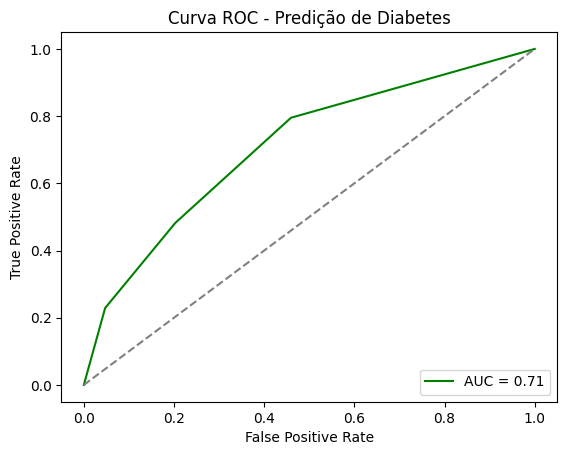

In [114]:
#curva ROC
from sklearn.metrics import roc_curve, auc

y_prob = knn.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Predição de Diabetes')
plt.legend(loc="lower right")
plt.show()

Alcançamos um AUC = 0.70 na curva ROC, sendo considerado um modelo razoável.
Significa que o modelo distinguiu bem os diabéticos dos não diabéticos, mas é possível melhorar fazendo o tratamento das variáveis zeradas ou utilizando outros modelos.

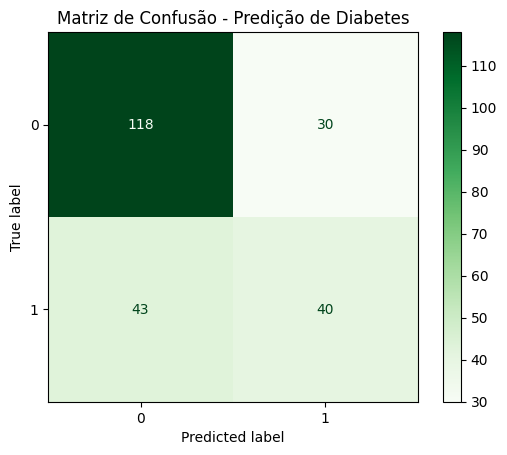

In [115]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Greens')
plt.title('Matriz de Confusão - Predição de Diabetes')
plt.show()

0  - sem diabetes - o modelo acertou 118 casos sem diabetes e errou 30 casos sem diabetes, informando que tinha.
1 - com diabetes - o modelo errou 43 casos de pacientes, dizendo que não tinham e eles tinham diabetes e acertou 40 casos de pacientes que tinham diabetes.



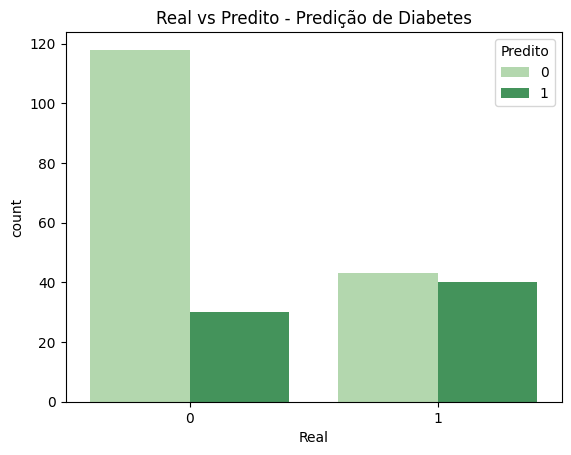

In [116]:
#real versus predito


resultado = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
sns.countplot(data=resultado, x='Real', hue='Predito', palette='Greens')
plt.title('Real vs Predito - Predição de Diabetes')
plt.show()